# Prediction of Market
1. KNeighborsClassifier: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
2. Desicion Tree: http://scikit-learn.org/stable/modules/tree.html
3. Neural Network: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

Data: Currency transition data from 2002 - 2017
Features: each currencies

# Libraries Import

In [3]:
import numpy as np
import pandas as pd
import urllib2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import collections
from scipy import stats
from sklearn.linear_model import SGDClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets, tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
%matplotlib inline

C:\ProgramData\Anaconda3\envs\anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\envs\anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Data Obtain

In [4]:
url = 'https://www.mizuhobank.co.jp/rate/market/csv/quote.csv'
response = urllib2.urlopen(url)
df = pd.read_csv(url)
cols = [13,14,17,20,26,27,28,29,30,31,32,33,34,35,36, 37]
df.drop(df.columns[cols],axis=1,inplace=True)
df = df.drop([0,1])
df.columns = ['Date', 'USD', 'GBP', 'EUR', 'CAD', 'CHF', 'SEK', 'DKK', 'NOK', 'AUD', 'NZD','ZAR','BHD','HKD','INR','PHP','SGD','THB','KWD','SAR','AED','MXN']
df.to_csv('quote.csv', index=False)

# Data visualise by histogram

C:\ProgramData\Anaconda3\envs\anaconda2\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


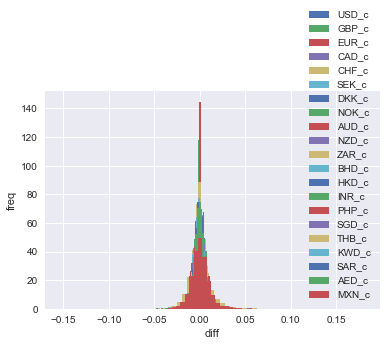

In [5]:
df_fx = pd.read_csv('./quote.csv')
pd.to_datetime(df_fx['Date'])
del df_fx['Date']
features = df_fx.columns
temp = []

for i in features:
    temp.append(i+"_c")

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for i in features:
    df_fx[i+"_c"] = ((df_fx[i].shift() - df_fx[i]))/ df_fx[i]
    ax.hist(df_fx[i+"_c"].dropna(), bins=50,normed=True)
    del df_fx[i]

ax.set_ylabel('freq')
ax.set_xlabel('diff')
ax.legend(loc='lower right')
fig.show()

# Data Processing

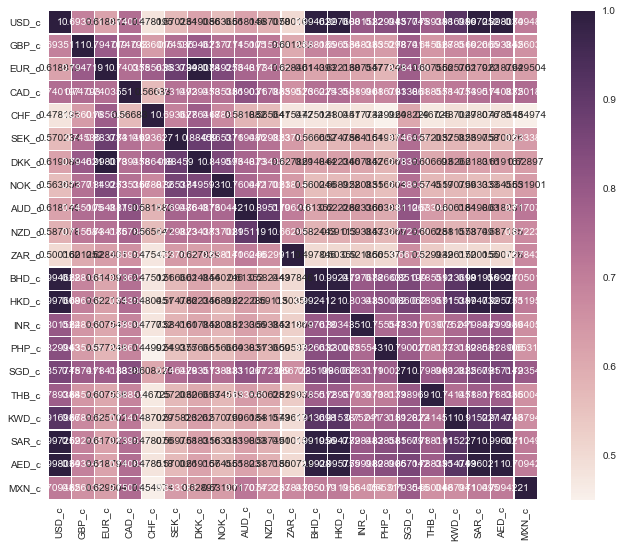

In [6]:
# Remove any null
df_fx = df_fx.dropna()

# store features
features = df_fx.columns

# data normalisation
stdsc = StandardScaler()
df_fx_scaled = stdsc.fit_transform(df_fx)
df_normalized = pd.DataFrame(df_fx_scaled)

# put back features to data
df_normalized.columns = features

# data visualise
plt.figure(figsize=(12, 9))
sns.heatmap(df_fx.corr(), annot=True, fmt='g', linewidth=0.1, vmax=1.0, square=True)
sns.plt.show()

# PCA for combining features
not used

In [7]:
# # Principle Composition Analysis
# pca = PCA(n_components=2)
# pca.fit_transform(df_fx)
# df_fx_pca = pd.DataFrame(pca.fit_transform(df_fx))

# # Data visualise
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.hist(df_fx_pca, bins=50)
# ax.legend(loc='lower right')
# fig.show()

# Make a conditions to classify
not used

In [8]:
# labels = MiniBatchKMeans(n_clusters=6).fit_predict(df_fx_pca)

# # visualise
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.hist(labels, bins=50)
# ax.legend(loc='lower right')
# fig.show()

count    3718.000000
mean        0.000069
std         0.006626
min        -0.047274
25%        -0.003550
50%         0.000000
75%         0.003615
max         0.049502
Name: USD_c, dtype: float64


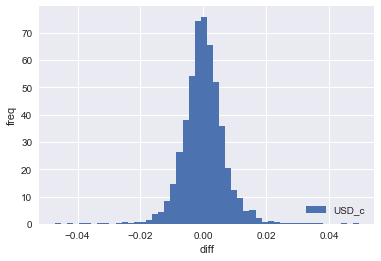

In [9]:
print(df_fx['USD_c'].describe())
# print(df_fx['USD_c'].var)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df_fx["USD_c"].dropna(), bins=50,normed=True)
ax.set_ylabel('freq')
ax.set_xlabel('diff')
ax.legend(loc='lower right')
fig.show()

In [10]:
def classifier(df_fx):
    if df_fx['USD_c'] > 0.02000:
        return 1
    elif df_fx['USD_c'] > 0.01000 and df_fx['USD_c'] <= 0.02000:
        return 2
    elif df_fx['USD_c'] > 0.00000 and df_fx['USD_c'] <= 0.01000:
        return 3
    elif df_fx['USD_c'] > -0.01000 and df_fx['USD_c'] <= 0.00000:
        return 4
    elif df_fx['USD_c'] > -0.02000 and df_fx['USD_c'] <= -0.01000:
        return 5
    elif df_fx['USD_c'] < -0.02000:
        return 6

df_ans = df_fx.apply(classifier, axis=1)

In [11]:
# cnt = []
# for i in df_fx['USD_c']:
#     if i > 0.02000:
#         cnt.append(1)
#     elif i > 0.01000 and i <= 0.02000:
#         cnt.append(2)
#     elif i > 0.00000 and i <= 0.01000:
#         cnt.append(3)
#     elif i > -0.01000 and i <= 0.00000:
#         cnt.append(4)
#     elif i > -0.02000 and i <= -0.01000:
#         cnt.append(5)
#     elif i < -0.02000:
#         cnt.append(6)

# print(collections.Counter(cnt))
# print(len(cnt))
# df_ans = pd.DataFrame(cnt)
# df_ans.columns = ['USD_s']
# print(df_ans.describe())
# print(len(df_ans))
# print(df_ans.head)

# Make Teachers

In [12]:
# df_ans = pd.DataFrame(labels)
# print(df_ans.describe())
# print(pd.value_counts(df_ans.values.flatten()))
# df_fx_pca.columns = ['f1','f2']
# df_ans.columns = ['label']
# train_x = pd.concat([df_fx_pca[0:int(len(df_fx_pca)*0.6)], df_ans[0:int(len(df_fx_pca)*0.6)]], axis=1)
# test_x = pd.concat([df_fx_pca[len(df_fx_pca)-int(len(df_fx_pca)*0.6):], df_ans[len(df_fx_pca)-int(len(df_fx_pca)*0.6):]], axis=1)

train_x, train_y = df_fx[0:int(len(df_fx)*0.6)], df_ans[0:int(len(df_ans)*0.6)]
test_x, test_y = df_fx[len(df_fx)-int(len(df_fx)*0.6):], df_ans[len(df_ans)-int(len(df_ans)*0.6):]
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)
print(train_y.describe())
print(test_y.describe())

(2230, 21)
(2230, 21)
(2230L,)
(2230L,)
count    2230.000000
mean        3.482063
std         0.724741
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
dtype: float64
count    2230.000000
mean        3.498206
std         0.745103
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
dtype: float64


# Model Fitting
1. SGDClassifier
2. KNeighborsClassifier
3. DecisionTreeClassifier

In [13]:
sgd = SGDClassifier(loss='hinge',penalty='l2')
sgd.fit(train_x, train_y)
predicted_sgd = sgd.predict(test_x)

In [14]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
predicted_knn = knn.predict(test_x)

In [15]:
clf = tree.DecisionTreeClassifier(max_depth=60)
clf = clf.fit(train_x, train_y)
predicted_tree = clf.predict(test_x)

In [16]:
print(sgd.score(test_x, test_y))
print(clf.score(test_x, test_y))
print(knn.score(test_x, test_y))

0.621524663677
0.998206278027
0.905381165919


In [17]:
print ("Accuracy of SGDClassifier: ", accuracy_score(predicted_sgd, test_y))
print ("elemtns of prediction of SGDClassifier: ", collections.Counter(predicted_sgd))
print (confusion_matrix(test_y, predicted_sgd))
print ("Accuracy of KNeighborsClassifier_noise: ", accuracy_score(predicted_knn, test_y))
print ("elemtns of prediction of KNN_noise: ", collections.Counter(predicted_knn))
print (confusion_matrix(test_y, predicted_knn))
print ("Accuracy of Decision Tree_noise: ", accuracy_score(predicted_tree, test_y))
print ("elemtns of prediction of Tree_noise: ", collections.Counter(predicted_tree))
print (confusion_matrix(test_y, predicted_tree))

('Accuracy of SGDClassifier: ', 0.62152466367713)
('elemtns of prediction of SGDClassifier: ', Counter({4: 1693, 3: 537}))
[[  0   0  19   0   0   0]
 [  0   0 124   0   0   0]
 [  0   0 387 569   0   0]
 [  0   0   7 999   0   0]
 [  0   0   0 108   0   0]
 [  0   0   0  17   0   0]]
('Accuracy of KNeighborsClassifier_noise: ', 0.90538116591928253)
('elemtns of prediction of KNN_noise: ', Counter({4: 1030, 3: 968, 2: 118, 5: 91, 6: 12, 1: 11}))
[[ 11   8   0   0   0   0]
 [  0  97  27   0   0   0]
 [  0  13 877  66   0   0]
 [  0   0  64 939   3   0]
 [  0   0   0  25  83   0]
 [  0   0   0   0   5  12]]
('Accuracy of Decision Tree_noise: ', 0.99820627802690587)
('elemtns of prediction of Tree_noise: ', Counter({4: 1008, 3: 956, 2: 122, 5: 106, 1: 21, 6: 17}))
[[  19    0    0    0    0    0]
 [   2  122    0    0    0    0]
 [   0    0  956    0    0    0]
 [   0    0    0 1006    0    0]
 [   0    0    0    2  106    0]
 [   0    0    0    0    0   17]]


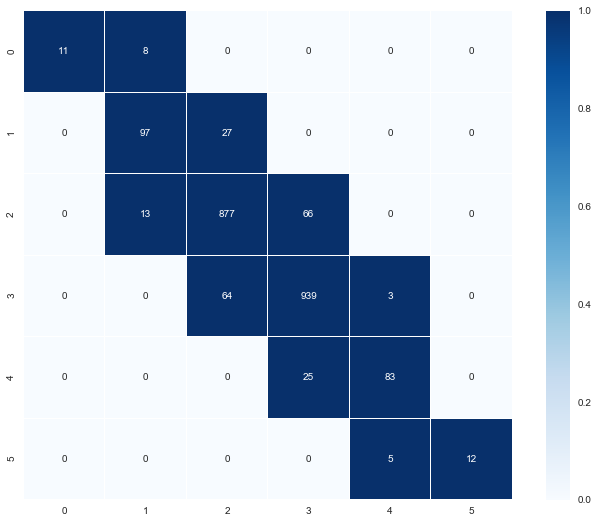

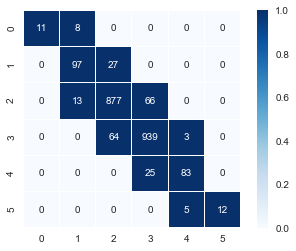

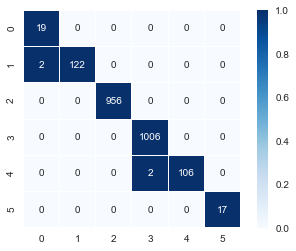

In [18]:
plt.figure(figsize=(12, 9))
sns.heatmap(confusion_matrix(test_y, predicted_knn), annot=True, fmt='g', cmap='Blues', linewidth=0.1, vmax=1.0, square=True)
sns.plt.show()
sns.heatmap(confusion_matrix(test_y, predicted_knn), annot=True, fmt='g', cmap='Blues', linewidth=0.1, vmax=1.0, square=True)
sns.plt.show()
sns.heatmap(confusion_matrix(test_y, predicted_tree), annot=True, fmt='g', cmap='Blues', linewidth=0.1, vmax=1.0, square=True)
sns.plt.show()

In [19]:
tree.export_graphviz(clf,out_file='tree.dot')

# Make output file

In [20]:
import os
from tempfile import mkstemp
import subprocess

from sklearn.tree.export import export_graphviz


def convert_decision_tree_to_ipython_image(clf, feature_names=None, class_names=None,
                                           image_filename=None, tmp_dir=None):
    dot_filename = mkstemp(suffix='.dot', dir=tmp_dir)[1]
    with open(dot_filename, "w") as out_file:
        export_graphviz(clf, out_file=out_file,
                        feature_names=feature_names,
                        class_names=class_names,
                        filled=True, rounded=True,
                        special_characters=True)

    from IPython.display import Image

    image_filename = image_filename or ('%s.png' % dot_filename)

    subprocess.call(('dot -Tpng -o %s %s' % (image_filename, dot_filename)).split(' '))
    image = Image(filename=image_filename)
    return image

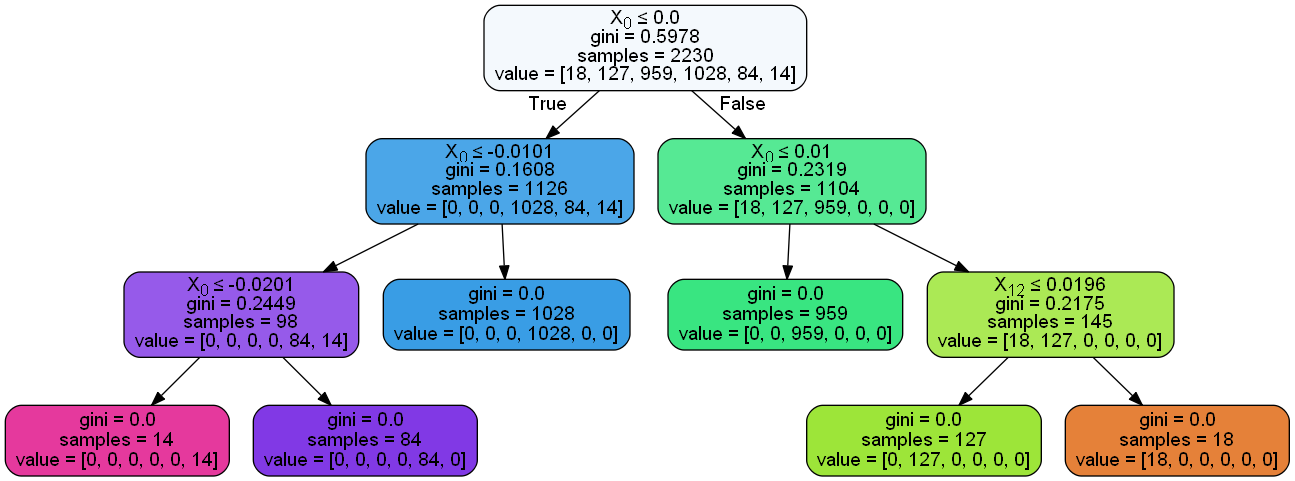

In [21]:
convert_decision_tree_to_ipython_image(clf, image_filename='tree.png')

In [78]:
print("2d to 3d", sgd.predict(test_x.iloc[-3]))
print("2d to 3d",knn.predict(test_x.iloc[-3]))
print("2d to 3d",clf.predict(test_x.iloc[-3]))
print("yesterday to today", sgd.predict(test_x.iloc[-2]))
print("yesterday to today",knn.predict(test_x.iloc[-2]))
print("yesterday to today",clf.predict(test_x.iloc[-2]))
print("today to tomorrow",sgd.predict(test_x.iloc[-1]))
print("today to tomorrow",knn.predict(test_x.iloc[-1]))
print("today to tomorrow",clf.predict(test_x.iloc[-1]))

('2d to 3d', array([4], dtype=int64))
('2d to 3d', array([4], dtype=int64))
('2d to 3d', array([4], dtype=int64))
('yesterday to today', array([4], dtype=int64))
('yesterday to today', array([3], dtype=int64))
('yesterday to today', array([3], dtype=int64))
('today to tomorrow', array([4], dtype=int64))
('today to tomorrow', array([4], dtype=int64))
('today to tomorrow', array([4], dtype=int64))


C:\ProgramData\Anaconda3\envs\anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if i

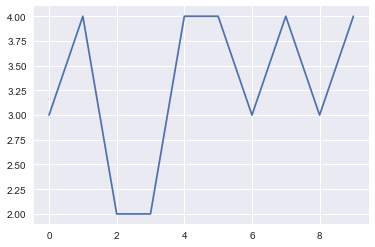

In [83]:
plt.plot(clf.predict(test_x.iloc[-10:]))
plt.show()

## Neural Network Implementation

## find best parametres for this datasets

In [28]:
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

def plot_on_dataset(X, y):
    mlps = []

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=400, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
            ax.plot(mlp.loss_curve_, label=label, **args)

## Check

In [29]:
plot_on_dataset(train_x, train_y)

training: constant learning-rate
Training set score: 0.505381
Training set loss: 0.939088
training: constant with momentum
Training set score: 0.762332
Training set loss: 0.798785
training: constant with Nesterov's momentum
Training set score: 0.777130
Training set loss: 0.733363
training: inv-scaling learning-rate
Training set score: 0.460987
Training set loss: 1.119224
training: inv-scaling with momentum
Training set score: 0.461883
Training set loss: 1.079641
training: inv-scaling with Nesterov's momentum
Training set score: 0.460987
Training set loss: 1.083418
training: adam
Training set score: 0.958744
Training set loss: 0.119476


## Use the best one for prediction

In [35]:
param = {'solver': 'adam', 'learning_rate_init': 0.01}
mlp = MLPClassifier(verbose=0, random_state=0, max_iter=400, **param)
mlp.fit(train_x, train_y)
mlp.predict(test_x)

print mlp.score(test_x, test_y)
print("yesterday to today",mlp.predict(test_x.iloc[-2]))
print("today to tomorrow",mlp.predict(test_x.iloc[-1]))

0.950224215247
('yesterday to today', array([3], dtype=int64))
('today to tomorrow', array([4], dtype=int64))


C:\ProgramData\Anaconda3\envs\anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


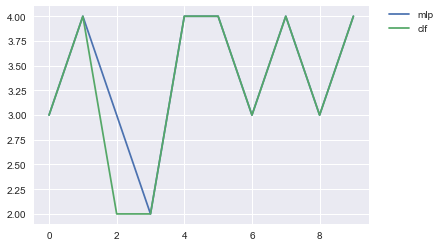

In [87]:
plt.plot(mlp.predict(test_x.iloc[-10:]), label='mlp')
plt.plot(clf.predict(test_x.iloc[-10:]), label='clf')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Stationarity Assessment

In [53]:
from statsmodels.tsa import arima_model
import matplotlib.pyplot as plt

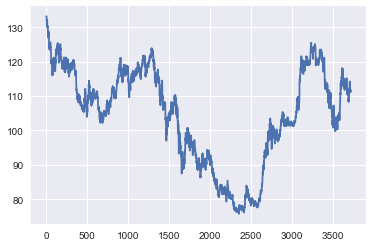

In [70]:
df_fx = pd.read_csv('./quote.csv')
close = df_fx['USD']
plt.plot(df_fx['USD'])
plt.show()

[ 1.          0.99819778  0.99649051  0.99484593  0.99313018  0.99147464
  0.98990335  0.98830457  0.9866695   0.98497613  0.98327678  0.98151036
  0.9797492   0.97804745  0.9763513   0.97467281  0.97302959  0.97145488
  0.96983048  0.96821638  0.96669378  0.96516941  0.96364869  0.96219485
  0.96078548  0.95939429  0.95791968  0.95640205  0.95499799  0.95357946
  0.95213187  0.95071485  0.94929561  0.94796042  0.9465981   0.94533437
  0.94401092  0.94260511  0.94115609  0.93960362  0.93803553]


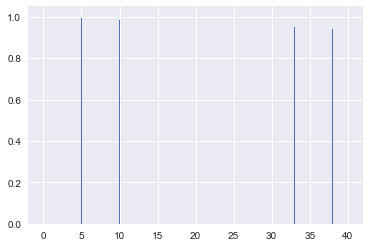

In [71]:
from statsmodels.tsa import stattools

close_acf = stattools.acf(df_fx['USD'])
print(close_acf)

plt.bar(range(len(close_acf)), close_acf, width = 0.01)
plt.show()

[  1.00000000e+00   9.98466257e-01   2.99579133e-02   2.04548748e-02
  -2.29232393e-02   1.77328709e-02   2.68744886e-02  -6.92514251e-03
  -1.30340084e-02  -2.19727669e-02  -3.27324324e-03  -2.29540948e-02
  -7.91125027e-04   1.63777981e-02   2.00494633e-03   5.14400345e-03
   9.64683213e-03   2.40200420e-02  -1.39144379e-02   2.88885011e-03
   2.81496996e-02   2.23551271e-03   1.48785922e-03   1.76668735e-02
   1.56338712e-02   7.80897888e-03  -2.86143495e-02  -1.78804572e-02
   3.58545043e-02  -1.50122542e-03  -1.17512463e-02   4.05182311e-03
   2.49328882e-04   2.97329889e-02  -8.90104761e-03   3.38232987e-02
  -1.76043175e-02  -2.61988657e-02  -1.92260466e-02  -3.46567188e-02
  -5.52880115e-03]


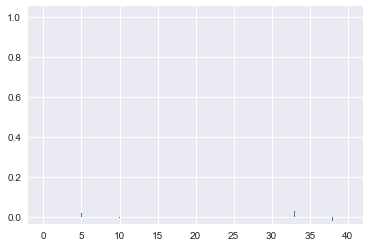

In [72]:
close_pacf = stattools.pacf(df_fx['USD'])
print(close_pacf)

plt.bar(range(len(close_pacf)), close_pacf, width = 0.01)
plt.show()

In [73]:
ctt = stattools.adfuller(close, regression="ctt")
ct = stattools.adfuller(close, regression="ct")
c = stattools.adfuller(close, regression="c")
nc = stattools.adfuller(close, regression="nc")

import pprint

pprint.pprint(ctt)
pprint.pprint(ct)
pprint.pprint(c)
pprint.pprint(nc)

(-1.9304865763762369,
 0.84205786603379074,
 3L,
 3715L,
 {'1%': -4.3742519019991661,
  '10%': -3.5542454722395109,
  '5%': -3.833980597743285},
 7726.4544316722613)
(-1.7404636185407312,
 0.73273407081297459,
 3L,
 3715L,
 {'1%': -3.9612089668751658,
  '10%': -3.1277462740643838,
  '5%': -3.4116724591087912},
 7725.6261013285712)
(-2.1190498653475314,
 0.23692386607152455,
 3L,
 3715L,
 {'1%': -3.4321114600792098,
  '10%': -2.567184308512469,
  '5%': -2.862318315640672},
 7724.3023894381176)
(-0.80127268700787402,
 0.36998478609895674,
 3L,
 3715L,
 {'1%': -2.5663420932199856,
  '10%': -1.6167487022110387,
  '5%': -1.9410725446904478},
 7725.6525270628608)


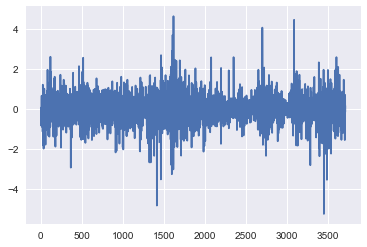

In [75]:
close_diff_1 = []

for i in range(len(close) -1):
    close_diff_1.append(close[i+1] - close[i])

type(close_diff_1)
len(close_diff_1)
plt.plot(close_diff_1)
plt.show()